### **Support Vector Machine Model**

#### **`Libraries`**

In [69]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#### Load Data

In [70]:
df = pd.read_csv(r"C:\Users\R\Desktop\Data Analysis\Datasets\diabetes.csv")

#### Explore

In [71]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df.shape

(768, 9)

In [73]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [74]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**0 ---> Non-Diabetic**
  
**1 ---> Diabetic**

In [75]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [76]:
df.groupby("Outcome").mean().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.30,109.98,68.18,19.66,68.79,30.30,0.43,31.19
1,4.87,141.26,70.82,22.16,100.34,35.14,0.55,37.07


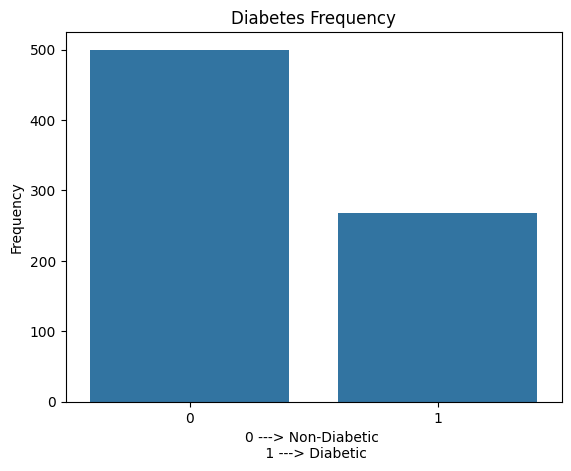

In [77]:
sns.barplot(df["Outcome"].value_counts())
plt.title("Diabetes Frequency")
plt.xlabel("0 ---> Non-Diabetic \n 1 ---> Diabetic")
plt.ylabel("Frequency")
plt.show()


#### Split Data

In [78]:
X = df.drop(columns="Outcome", axis=1)
y = df["Outcome"]

In [79]:
X.shape

(768, 8)

In [80]:
y.shape

(768,)

Data Standardization

In [81]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler()

In [82]:
scaled_df = scaler.transform(X)

In [83]:
X = scaled_df
y = df["Outcome"]

#### Train Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2) 

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#### Model Training: Support Vector Machine Classifier

In [86]:
classifier = svm.SVC(kernel = "linear")

In [87]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

#### Model Evaluation
Accuracy Score

In [88]:
X_train_pred = classifier.predict(X_train)

training_data_accuracy = round(accuracy_score(X_train_pred, y_train)*100, 2)
print("Accuracy Score of Training Data : ", training_data_accuracy, "%")

Accuracy Score of Training Data :  78.66 %


In [89]:
X_test_pred = classifier.predict(X_test)

test_data_accuracy = round(accuracy_score(X_test_pred, y_test) * 100, 2)
print("Accuracy Score of Test Data : ", test_data_accuracy, "%")

Accuracy Score of Test Data :  77.27 %


#### Predicitive System

In [92]:
input_data = (5,166,72,19,175,25.8,0.587,51) 

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped) 

prediction = classifier.predict(std_data)
prediction

array([1])

Prediction

In [93]:
if prediction[0] == 0:
    print("The person is Non-Diabetic")
else:
    print("The person is Diabetic")

The person is Diabetic
